In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score

# Load dataset
df = pd.read_csv("dataset_part_3.csv")

# Target and Features
y = df['Success'].astype(int)
features = df[['FlightNumber', 'PayloadMass_kg', 'Orbit', 'Launch_Site',
               'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad',
               'Block', 'ReusedCount', 'Serial']]

# One-hot encoding for categorical features
X = pd.get_dummies(features, columns=['Orbit', 'Launch_Site', 'LandingPad', 'Serial'])

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed'])



In [5]:
Y_test.shape

(18,)

# Logistic regression

In [6]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}
# define the model
lr = LogisticRegression(random_state = 12345)

# define the grid search object
grid_search_lr = GridSearchCV(
    estimator = lr,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10
)
# execute search
logreg_cv = grid_search_lr.fit(X_train,Y_train)


In [7]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8303571428571427


In [8]:
print('Accuracy on test data is: {:.3f}'.format(logreg_cv.score(X_test, Y_test)))

Accuracy on test data is: 0.944


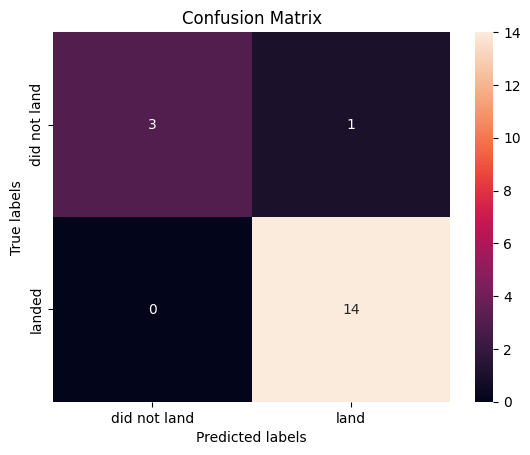

In [9]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# 2. Support Vector Machine

tuned hpyerparameters :(best parameters)  {'C': 0.03162277660168379, 'gamma': 0.001, 'kernel': 'linear'}
accuracy : 0.8321428571428571
Accuracy on test data is: 0.889


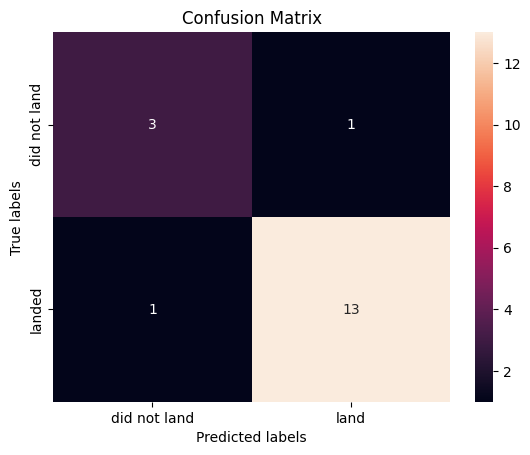

In [16]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
# define the model
svm = SVC(random_state = 12345)

# define the grid search object
grid_search_svm = GridSearchCV(
    estimator = svm,
    param_grid = parameters,
    scoring = 'accuracy',
    cv = 10
)
# execute search
svm_cv = grid_search_svm.fit(X_train,Y_train)

print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

print('Accuracy on test data is: {:.3f}'.format(svm_cv.score(X_test, Y_test)))

yhat = svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

# 3. Decision Tree

Tuned hyperparameters (best parameters): {'max_depth': 3, 'min_samples_split': 10}
Cross-validated accuracy: 0.7910714285714284
Accuracy on test data is: 0.833


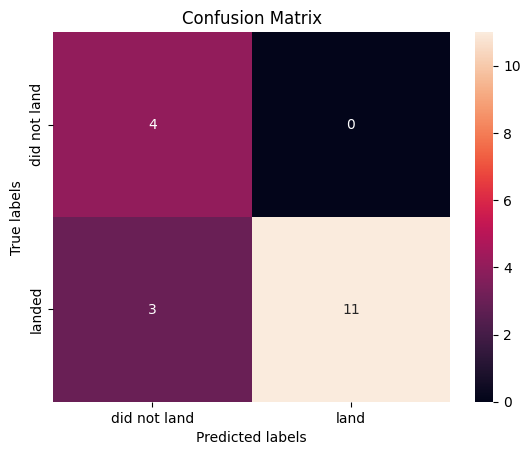

In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Define the parameter grid
parameters = {
    'max_depth': [3, 5, 7, 9, 11],
    'min_samples_split': [2, 5, 10]
}

# Define the model
dt = DecisionTreeClassifier(random_state=12345)

# GridSearchCV
grid_search_dt = GridSearchCV(
    estimator=dt,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)

# Execute search
dt_cv = grid_search_dt.fit(X_train, Y_train)

# Results
print("Tuned hyperparameters (best parameters):", dt_cv.best_params_)
print("Cross-validated accuracy:", dt_cv.best_score_)
print("Accuracy on test data is: {:.3f}".format(dt_cv.score(X_test, Y_test)))

# Prediction & confusion matrix
yhat = dt_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


# K-Nearest Neighbors (KNN)

Tuned hyperparameters (best parameters): {'n_neighbors': 3, 'weights': 'uniform'}
Cross-validated accuracy: 0.6392857142857142
Accuracy on test data is: 0.778


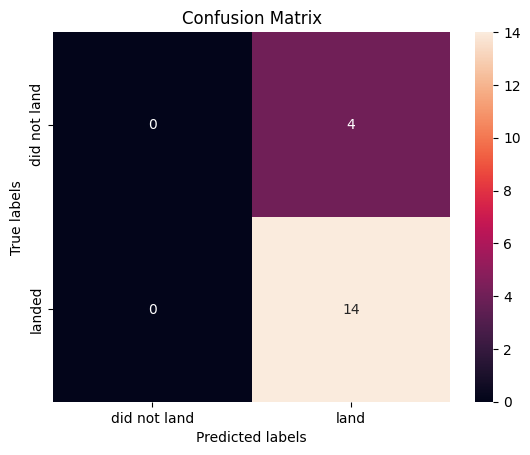

In [18]:
from sklearn.neighbors import KNeighborsClassifier

# Define the parameter grid
parameters = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance']
}

# Define the model
knn = KNeighborsClassifier()

# GridSearchCV
grid_search_knn = GridSearchCV(
    estimator=knn,
    param_grid=parameters,
    scoring='accuracy',
    cv=10
)

# Execute search
knn_cv = grid_search_knn.fit(X_train, Y_train)

# Results
print("Tuned hyperparameters (best parameters):", knn_cv.best_params_)
print("Cross-validated accuracy:", knn_cv.best_score_)
print("Accuracy on test data is: {:.3f}".format(knn_cv.score(X_test, Y_test)))

# Prediction & confusion matrix
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test, yhat)


# Comparision of models

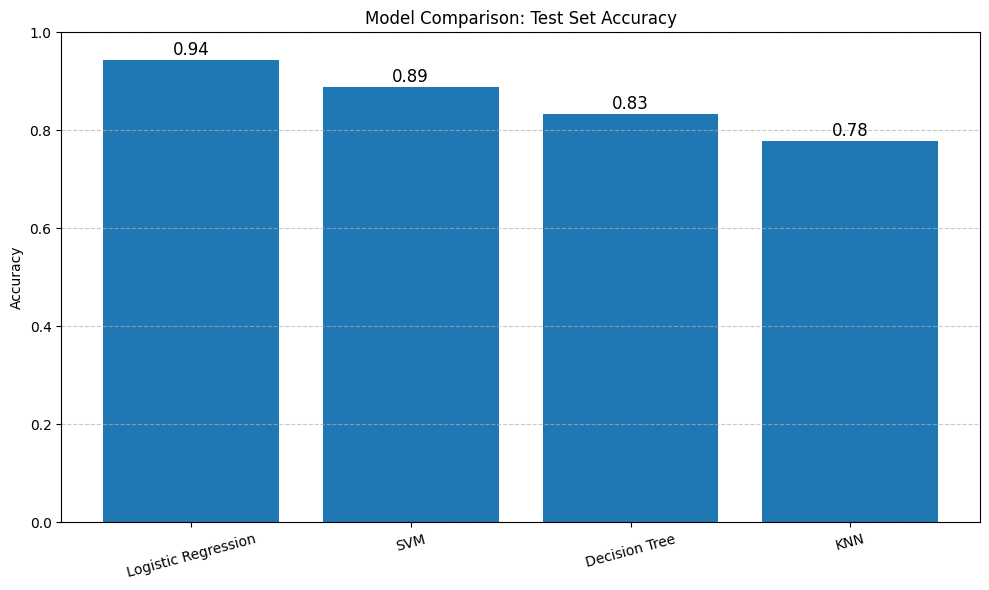

In [19]:
import matplotlib.pyplot as plt

# Store test accuracies from your previous results
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
test_accuracies = [
    logreg_cv.score(X_test, Y_test),   # from your logistic regression model
    svm_cv.score(X_test, Y_test),      # from SVM
    dt_cv.score(X_test, Y_test),       # from decision tree
    knn_cv.score(X_test, Y_test)       # from KNN
]

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, test_accuracies)
plt.title('Model Comparison: Test Set Accuracy')
plt.ylabel('Accuracy')
plt.ylim(0, 1)

# Annotate each bar with its value
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', fontsize=12)

plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
